**INFOPILLAR SOLUTIONS Fake News Detection Project**

In [55]:
import pandas as pd
import numpy as np
df=pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [56]:
x=df["text"]
y=df["label"]
x.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words="english",max_df=0.7)
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [59]:
from sklearn.linear_model import PassiveAggressiveClassifier
model=PassiveAggressiveClassifier()
model.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [60]:
y_test=np.array(y_test)
y_predicted=model.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

<AxesSubplot:>

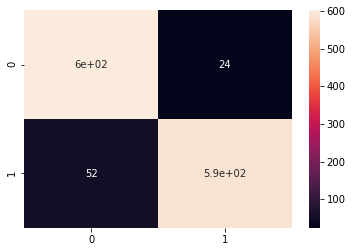

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
sns.heatmap(cm,annot=True)